In [42]:
#import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity

import warnings
warnings.filterwarnings('ignore')

In [2]:
#load the dataset
credit=pd.read_csv("credits.csv")
rating = pd.read_csv('ratings_small.csv')
movie= pd.read_csv("movies_metadata.csv")

In [3]:
#show first 5 rows of each datasets
credit.head()

,cast,crew,id
0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862
1,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",8844
2,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",15602
3,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...",31357
4,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...",11862


# Data Pre-processing

In [4]:
rating.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [5]:
movie.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [6]:
#some unwanted rows in movie id column
movie = movie.drop([19730, 29503, 35587])

In [7]:
#check datatypes of columns
movie.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45463 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45463 non-null  object 
 1   belongs_to_collection  4491 non-null   object 
 2   budget                 45463 non-null  object 
 3   genres                 45463 non-null  object 
 4   homepage               7779 non-null   object 
 5   id                     45463 non-null  object 
 6   imdb_id                45446 non-null  object 
 7   original_language      45452 non-null  object 
 8   original_title         45463 non-null  object 
 9   overview               44509 non-null  object 
 10  popularity             45460 non-null  object 
 11  poster_path            45077 non-null  object 
 12  production_companies   45460 non-null  object 
 13  production_countries   45460 non-null  object 
 14  release_date           45376 non-null  object 
 15  re

In [8]:
#as id ,budget and popularity are an object type when checked using movie.info(), need to convert in numerical
cols=['budget','popularity','id']
movie[cols] = movie[cols].apply(pd.to_numeric)

In [9]:
#merge the movie and credit dataset on basis of id
movie_crew = movie.merge(credit,on='id')

In [10]:
movie_crew.head(2)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,cast,crew
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de..."
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de..."


# EDA

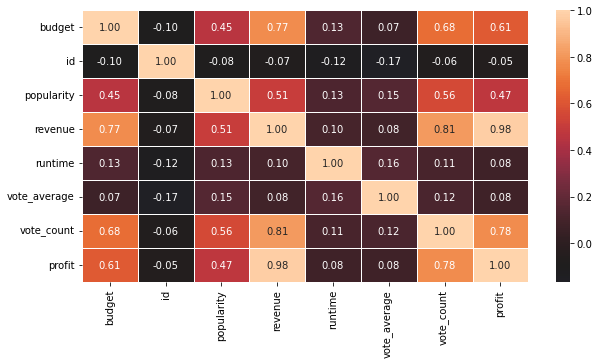

In [11]:
import seaborn as sns
#find overall profit
movie_crew["profit"]=movie_crew["revenue"]-movie_crew["budget"] # adding profit column to see its correlation
#visualization using correlation among numerical column using heatmap
plt.subplots(figsize = (10,5))
sns.heatmap (movie_crew.corr(), annot = True,linewidths =0.75,linecolor = "White",fmt = ".2f",center = -0.1)
plt.show()

In [12]:
#Check the top 10 highest profit generated movies 
x=movie_crew[movie_crew['revenue'].notnull()][['title', 'budget', 'revenue','profit']].sort_values('profit', ascending=False)[:10]
x

,title,budget,revenue,profit
14617,Avatar,237000000,2.787965e+09,2.550965e+09
26640,Star Wars: The Force Awakens,245000000,2.068224e+09,1.823224e+09
1647,Titanic,200000000,1.845034e+09,1.645034e+09
25155,Jurassic World,150000000,1.513529e+09,1.363529e+09
28914,Furious 7,190000000,1.506249e+09,1.316249e+09
17890,The Avengers,220000000,1.519558e+09,1.299558e+09
17509,Harry Potter and the Deathly Hallows: Part 2,125000000,1.342000e+09,1.217000e+09
26643,Avengers: Age of Ultron,280000000,1.405404e+09,1.125404e+09
22182,Frozen,150000000,1.274219e+09,1.124219e+09
42298,Beauty and the Beast,160000000,1.262886e+09,1.102886e+09


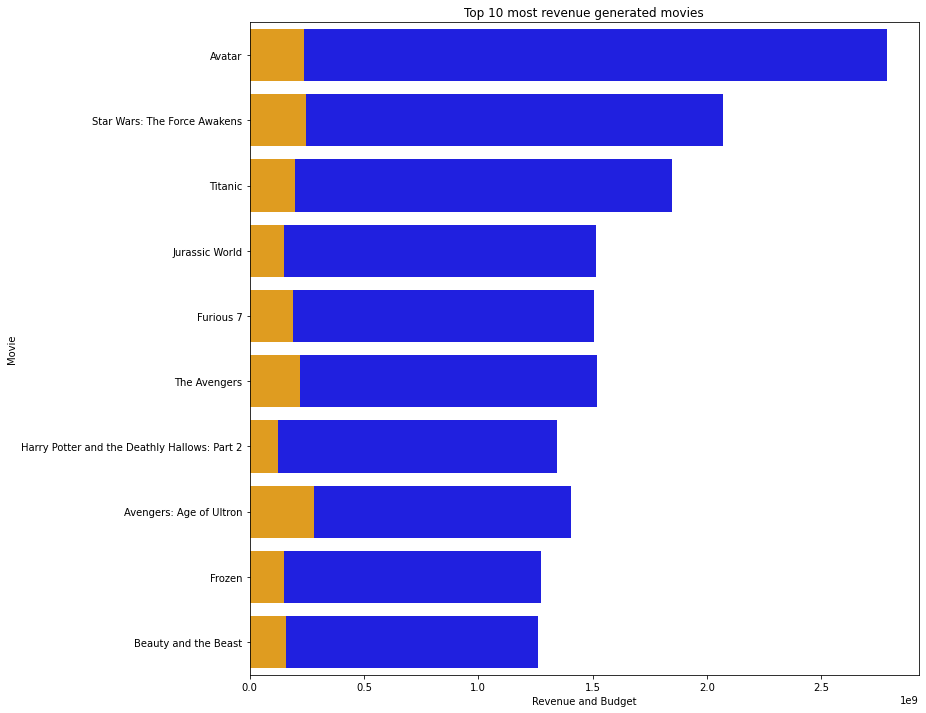

In [13]:
#visualize the above detail in form of graph
plt.figure(figsize = (12,12))
sns.barplot(x = "revenue",y= "title", data=  x.head(10),color="blue",Label="Revenue")
sns.barplot(x = "budget", y = "title",data= x.head(10),color= "orange", label ="Budget")
plt.xlabel("Revenue and Budget")
plt.ylabel("Movie")
plt.title("Top 10 most revenue generated movies")
plt.show()

In [14]:
#Avatar is the highest revenue with highest profit movie.

In [15]:
#WE ONLY NEED GENERE NAME
import ast
def extract_genre(text):
    G=[]
    for i in ast.literal_eval(text):
        #append name value only from each column dictonary
        G.append(i['name']) 
    return G
movie_crew['genres']=movie_crew['genres'].apply(extract_genre)       

In [16]:
movie_crew["genres"].head(10)

0           [Animation, Comedy, Family]
1          [Adventure, Fantasy, Family]
2                     [Romance, Comedy]
3              [Comedy, Drama, Romance]
4                              [Comedy]
5      [Action, Crime, Drama, Thriller]
6                     [Comedy, Romance]
7    [Action, Adventure, Drama, Family]
8         [Action, Adventure, Thriller]
9         [Adventure, Action, Thriller]
Name: genres, dtype: object

In [17]:
#create a function to count number of generes realsed till nowl
def count_genere(movie, col):
    count = {}
    for row in movie[col].dropna():
        if len(row) > 0:
            for key in row:
                if key in count:
                    count[key] += 1
                else:
                    count[key] = 1
        else:
            pass
    return count

<AxesSubplot:>

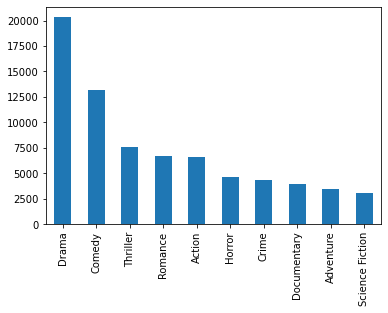

In [18]:
#visualize the top 10 genre 
genre_count = pd.Series(count_genere(movie_crew, 'genres'))
genre_count.sort_values(ascending = False).head(10).plot(kind = 'bar')

In [19]:
#Most of the people watch drama movies

# Content Based Filtering

In [20]:
#recommendation based on the description of the movie
movie_info= movie_crew[['id','title','overview','genres','cast','crew','vote_count']]

In [21]:
movie_info.isnull().sum()

id              0
title           3
overview      954
genres          0
cast            0
crew            0
vote_count      3
dtype: int64

In [22]:
#drop null values
movie_info.dropna(inplace=True)

In [23]:
# only keep movie which has vote more than 10
movie_info = movie_info[movie_info.vote_count > 10]
movie_info.shape

(21645, 7)

In [24]:
movie_check=movie_info.copy()

In [25]:
#Extract top 3 actors from cast
def cast(text):
    L = []
    counter = 0
    for i in ast.literal_eval(text):
        if counter != 3:
            L.append(i['name'])
            counter+=1
        else:
            break
    return L

In [26]:
movie_info['cast'] = movie_info['cast'].apply(cast)
movie_info.head(2)

,id,title,overview,genres,cast,crew,vote_count
0,862,Toy Story,"Led by Woody, Andy's toys live happily in his ...","[Animation, Comedy, Family]","[Tom Hanks, Tim Allen, Don Rickles]","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",5415.0
1,8844,Jumanji,When siblings Judy and Peter discover an encha...,"[Adventure, Fantasy, Family]","[Robin Williams, Jonathan Hyde, Kirsten Dunst]","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",2413.0


In [27]:
#Extract Director name from the crew
def Director(text):
    L = []
    for i in ast.literal_eval(text):
        if i['job'] == 'Director':
            L.append(i['name'])
    return L

In [28]:
movie_info['crew'] = movie_info['crew'].apply(Director)
movie_info.head(2)

,id,title,overview,genres,cast,crew,vote_count
0,862,Toy Story,"Led by Woody, Andy's toys live happily in his ...","[Animation, Comedy, Family]","[Tom Hanks, Tim Allen, Don Rickles]",[John Lasseter],5415.0
1,8844,Jumanji,When siblings Judy and Peter discover an encha...,"[Adventure, Fantasy, Family]","[Robin Williams, Jonathan Hyde, Kirsten Dunst]",[Joe Johnston],2413.0


In [29]:
#to make overview column compatible to other columns
movie_info['overview'] = movie_info['overview'].apply(lambda x:x.split())

In [30]:
movie_info

,id,title,overview,genres,cast,crew,vote_count
0,862,Toy Story,"[Led, by, Woody,, Andy's, toys, live, happily,...","[Animation, Comedy, Family]","[Tom Hanks, Tim Allen, Don Rickles]",[John Lasseter],5415.0
1,8844,Jumanji,"[When, siblings, Judy, and, Peter, discover, a...","[Adventure, Fantasy, Family]","[Robin Williams, Jonathan Hyde, Kirsten Dunst]",[Joe Johnston],2413.0
2,15602,Grumpier Old Men,"[A, family, wedding, reignites, the, ancient, ...","[Romance, Comedy]","[Walter Matthau, Jack Lemmon, Ann-Margret]",[Howard Deutch],92.0
3,31357,Waiting to Exhale,"[Cheated, on,, mistreated, and, stepped, on,, ...","[Comedy, Drama, Romance]","[Whitney Houston, Angela Bassett, Loretta Devine]",[Forest Whitaker],34.0
4,11862,Father of the Bride Part II,"[Just, when, George, Banks, has, recovered, fr...",[Comedy],"[Steve Martin, Diane Keaton, Martin Short]",[Charles Shyer],173.0
...,...,...,...,...,...,...,...
45515,49279,The Man with the Rubber Head,"[A, chemist, in, his, laboratory, places, upon...","[Comedy, Fantasy, Science Fiction]",[Georges Méliès],[Georges Méliès],29.0
45518,49271,The Devilish Tenant,"[A, man, rents, an, apartment, and, furnishes,...","[Fantasy, Comedy]","[André Méliès, Georges Méliès]",[Georges Méliès],12.0
45522,49280,The One-Man Band,"[A, band-leader, has, arranged, seven, chairs,...","[Fantasy, Action, Thriller]",[Georges Méliès],[Georges Méliès],22.0
45525,404604,Mom,"[The, bliss, of, a, biology, teacher’s, family...","[Crime, Drama, Thriller]","[Sridevi Kapoor, Sajal Ali, Akshaye Khanna]",[Ravi Udyawar],14.0


In [31]:
#remove empty value from list
def remove_whitespace(col):
    L1 = []
    for i in col:
        L1.append(i.replace(" ",""))
    return L1

In [32]:
movie_info['cast'] = movie_info['cast'].apply(remove_whitespace)
movie_info['crew'] = movie_info['crew'].apply(remove_whitespace)
movie_info['genres'] = movie_info['genres'].apply(remove_whitespace)

In [33]:
#Remove extra spaces from title too
movie_info["title"]= movie_info['title'].apply(lambda x: x.replace(" ", ""))

In [34]:
#add all the information into one column info
movie_info['info'] = movie_info['overview'] + movie_info['genres']  + movie_info['cast'] + movie_info['crew']
movie_info['info'] = movie_info['info'].apply(lambda x: ' '.join(x)) + movie_info['title']
movie_info

,id,title,overview,genres,cast,crew,vote_count,info
0,862,ToyStory,"[Led, by, Woody,, Andy's, toys, live, happily,...","[Animation, Comedy, Family]","[TomHanks, TimAllen, DonRickles]",[JohnLasseter],5415.0,"Led by Woody, Andy's toys live happily in his ..."
1,8844,Jumanji,"[When, siblings, Judy, and, Peter, discover, a...","[Adventure, Fantasy, Family]","[RobinWilliams, JonathanHyde, KirstenDunst]",[JoeJohnston],2413.0,When siblings Judy and Peter discover an encha...
2,15602,GrumpierOldMen,"[A, family, wedding, reignites, the, ancient, ...","[Romance, Comedy]","[WalterMatthau, JackLemmon, Ann-Margret]",[HowardDeutch],92.0,A family wedding reignites the ancient feud be...
3,31357,WaitingtoExhale,"[Cheated, on,, mistreated, and, stepped, on,, ...","[Comedy, Drama, Romance]","[WhitneyHouston, AngelaBassett, LorettaDevine]",[ForestWhitaker],34.0,"Cheated on, mistreated and stepped on, the wom..."
4,11862,FatheroftheBridePartII,"[Just, when, George, Banks, has, recovered, fr...",[Comedy],"[SteveMartin, DianeKeaton, MartinShort]",[CharlesShyer],173.0,Just when George Banks has recovered from his ...
...,...,...,...,...,...,...,...,...
45515,49279,TheManwiththeRubberHead,"[A, chemist, in, his, laboratory, places, upon...","[Comedy, Fantasy, ScienceFiction]",[GeorgesMéliès],[GeorgesMéliès],29.0,A chemist in his laboratory places upon a tabl...
45518,49271,TheDevilishTenant,"[A, man, rents, an, apartment, and, furnishes,...","[Fantasy, Comedy]","[AndréMéliès, GeorgesMéliès]",[GeorgesMéliès],12.0,A man rents an apartment and furnishes it in r...
45522,49280,TheOne-ManBand,"[A, band-leader, has, arranged, seven, chairs,...","[Fantasy, Action, Thriller]",[GeorgesMéliès],[GeorgesMéliès],22.0,A band-leader has arranged seven chairs for th...
45525,404604,Mom,"[The, bliss, of, a, biology, teacher’s, family...","[Crime, Drama, Thriller]","[SrideviKapoor, SajalAli, AkshayeKhanna]",[RaviUdyawar],14.0,The bliss of a biology teacher’s family life i...


In [35]:
#Perform Nlp operation on textual info column
import nltk
from nltk.stem import PorterStemmer
ps =PorterStemmer()
nltk.download('stopwords')
nltk.download('wordnet')
stopword_list = nltk.corpus.stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [36]:
#function to remove punctuation
import string
def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, ' ')
    return text

In [37]:
#Clean the info text
movie_info['info'] = movie_info['info'].apply(remove_punctuations)
#lower the values
movie_info['info'] = movie_info['info'].apply(lambda x: x.lower()) 
#Remove stopwords
movie_info['info'] = movie_info['info'].apply(lambda x: ' '.join([i for i in x.split() if i not in stopword_list]))
#Convert words to their stem word
movie_info['info'] = movie_info['info'].apply(lambda x:' '.join([ps.stem(i) for i in x.split()]))

In [38]:
movie_info['info'][0]

'led woodi andi toy live happili room andi birthday bring buzz lightyear onto scene afraid lose place andi heart woodi plot buzz circumst separ buzz woodi owner duo eventu learn put asid differ anim comedi famili tomhank timallen donrickl johnlassetertoystori'

In [39]:
#Convert textual info to vector
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=5000,stop_words='english')

In [40]:
#fit the column info in count vectorization
vector = cv.fit_transform(movie_info['info']).toarray()

In [43]:
#using cosine similarity find the similarity score between each movie
similarity = cosine_similarity(vector)

In [360]:
similarity

array([[1.        , 0.06668313, 0.04956816, ..., 0.        , 0.03143473,
        0.03077287],
       [0.06668313, 1.        , 0.07271792, ..., 0.01669451, 0.03074377,
        0.        ],
       [0.04956816, 0.07271792, 1.        , ..., 0.        , 0.03427956,
        0.0335578 ],
       ...,
       [0.        , 0.01669451, 0.        , ..., 1.        , 0.02360961,
        0.02311251],
       [0.03143473, 0.03074377, 0.03427956, ..., 0.02360961, 1.        ,
        0.04256283],
       [0.03077287, 0.        , 0.0335578 , ..., 0.02311251, 0.04256283,
        1.        ]])

In [67]:
#make a function to recommend top 5 movies
def recommend(movie):
    index = movie_check[movie_check['title'] == movie].index[0]
    distances = sorted(list(enumerate(similarity[index])),reverse=True,key = lambda x: x[1])
    for i in distances[1:6]:
        print(movie_check.iloc[i[0]].title)
recommend('The Dark Knight')

Mega Shark vs. Mecha Shark
The Cottage
Shark Attack 3: Megalodon
Godzilla
The Corridor


# Collabrative Filtering


In [45]:
# recommendations based on user rating similarity
#import rating dataset
rating = pd.read_csv('ratings_small.csv')
rating.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [46]:
#remove timestamp as it's not useful in filtering
rating=rating.drop(['timestamp'],axis=1)

In [47]:
#only relevant fields for filtering
title=movie_crew[['title','id']]
title.head()

,title,id
0,Toy Story,862
1,Jumanji,8844
2,Grumpier Old Men,15602
3,Waiting to Exhale,31357
4,Father of the Bride Part II,11862


In [48]:
#merge rating and movie dataset, so that rating can be seen with movie name along with movie id
movie_rating=pd.merge(rating,title,left_on='movieId',right_on='id',how='inner').drop('id', axis='columns')
movie_rating

,userId,movieId,rating,title
0,1,1371,2.5,Rocky III
1,4,1371,4.0,Rocky III
2,7,1371,3.0,Rocky III
3,19,1371,4.0,Rocky III
4,21,1371,3.0,Rocky III
...,...,...,...,...
45001,652,129009,4.0,Love Is a Ball
45002,653,2103,3.0,Solaris
45003,659,167,4.0,K-PAX
45004,659,563,3.0,Starship Troopers


In [49]:
#make a table with user id as index and their rating given to all movies.
usermatrix= movie_rating.pivot_table(index=['userId'],columns=['title'],values='rating').reset_index(drop=True)
#if there no rating for the particular user id fill 0
usermatrix.fillna( 0, inplace = True )

In [50]:
movie_rating["title"].value_counts()

Terminator 3: Rise of the Machines    324
The Million Dollar Hotel              311
Solaris                               305
The 39 Steps                          291
Monsoon Wedding                       274
                                     ... 
Fixing Frank                            1
Annie's Point                           1
Piranha 3DD                             1
Shanghai Ghetto                         1
Spirited Away                           1
Name: title, Length: 2794, dtype: int64

In [51]:
usermatrix

title,!Women Art Revolution,'Gator Bait,'Twas the Night Before Christmas,...And God Created Woman,00 Schneider - Jagd auf Nihil Baxter,10 Items or Less,10 Things I Hate About You,"10,000 BC",11'09''01 - September 11,12 Angry Men,...,Zodiac,Zombie Flesh Eaters,Zombie Holocaust,Zozo,eXistenZ,xXx,¡Three Amigos!,À nos amours,Ödipussi,Şaban Oğlu Şaban
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
666,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
668,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
669,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [52]:
#find the pearson correaltion among movies
corrMatrix = usermatrix.corr(method='pearson')
corrMatrix

title,!Women Art Revolution,'Gator Bait,'Twas the Night Before Christmas,...And God Created Woman,00 Schneider - Jagd auf Nihil Baxter,10 Items or Less,10 Things I Hate About You,"10,000 BC",11'09''01 - September 11,12 Angry Men,...,Zodiac,Zombie Flesh Eaters,Zombie Holocaust,Zozo,eXistenZ,xXx,¡Three Amigos!,À nos amours,Ödipussi,Şaban Oğlu Şaban
title,,,,,,,,,,,,,,,,,,,,,
!Women Art Revolution,1.000000,-0.002106,0.512265,-0.002106,-0.002958,-0.006967,-0.005311,-0.003646,-0.002106,-0.002106,...,-0.006580,-0.002106,-0.003613,-0.002940,-0.007274,0.110024,-0.002106,-0.007461,-0.002106,-0.002106
'Gator Bait,-0.002106,1.000000,-0.002096,-0.001493,-0.002096,0.204296,-0.003764,-0.002584,-0.001493,-0.001493,...,-0.004663,-0.001493,-0.002561,-0.002084,-0.005155,0.178030,-0.001493,0.033277,-0.001493,-0.001493
'Twas the Night Before Christmas,0.512265,-0.002096,1.000000,-0.002096,-0.002943,-0.006933,-0.005286,-0.003629,-0.002096,-0.002096,...,-0.006549,-0.002096,-0.003596,-0.002926,-0.007239,-0.010945,-0.002096,-0.007425,-0.002096,-0.002096
...And God Created Woman,-0.002106,-0.001493,-0.002096,1.000000,0.789007,0.343784,-0.003764,-0.002584,-0.001493,-0.001493,...,-0.004663,1.000000,0.630465,0.813440,0.337334,0.124937,1.000000,-0.005288,-0.001493,-0.001493
00 Schneider - Jagd auf Nihil Baxter,-0.002958,-0.002096,-0.002943,0.789007,1.000000,0.268530,-0.005286,-0.003629,-0.002096,-0.002096,...,-0.006549,0.789007,0.496446,0.641276,0.263301,0.093902,0.789007,0.205818,-0.002096,-0.002096
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
xXx,0.110024,0.178030,-0.010945,0.124937,0.093902,0.133206,-0.005180,-0.013494,-0.007794,-0.007794,...,0.083932,0.124937,0.070525,0.097204,0.018472,1.000000,0.124937,-0.020455,-0.007794,-0.007794
¡Three Amigos!,-0.002106,-0.001493,-0.002096,1.000000,0.789007,0.343784,-0.003764,-0.002584,-0.001493,-0.001493,...,-0.004663,1.000000,0.630465,0.813440,0.337334,0.124937,1.000000,-0.005288,-0.001493,-0.001493
À nos amours,-0.007461,0.033277,-0.007425,-0.005288,0.205818,-0.009434,0.018207,-0.009155,-0.005288,-0.005288,...,-0.016520,-0.005288,-0.009072,-0.007381,0.208576,-0.020455,-0.005288,1.000000,-0.005288,-0.005288


In [60]:
#define a function to recommend top 10 movie based on user input movie
def recommend1(movie):
    #filter out movies with more than 0.5 similarities with the particular movie entered
    x=corrMatrix[movie]
    #slice top 10 matching movie 
    y=x.sort_values(ascending=False)[1:11]
    print(f"Recommendation based on {movie} is:")
    #print the movie title only 
    for i in range(len(y)):
        print(str((i+1))+" "+y.index[i])

In [61]:
recommend1("Rocky III")

Recommendation based on Rocky III is:
1 Rocky V
2 The Discovery of Heaven
3 Rocky IV
4 Sweet Sixteen
5 Blood Diamond
6 Two Weeks Notice
7 American Pie
8 Kiss of the Dragon
9 Harry Potter and the Goblet of Fire
10 The Thing


In [ ]:
#It's highly recommended to use content base filtering if usermatrix is sparse.